In [1]:
import pypint

You are using Pint version 2016-12-15 and pypint 1.0rc2

## State graph analysis

### Fixpoints

Fixpoints are global states of the networks where no transition is possible.
Pint implements the complete fixpoints computation in automata networks as Boolean satisfaction constraints (SAT).
It should be tractable on networks with hundreds of components. Usually, the main limitation is the potential very high number of fixpoints.

Let us illustrate the fixpoint computation on a medium size example:

In [2]:
erbb = pypint.load("models/ERBB_G1-S.an")
len(erbb.automata)

Source file is in Automata Network (an) format

20

In [3]:
fps = erbb.fixpoints()
import pandas as pd # for pretty display of fixpoints
pd.DataFrame(fps)

,AKT1,CDK2,CDK4,CDK6,CycD1,CycE1,EGF,ERBB1,ERBB1_2,ERBB1_3,ERBB2,ERBB2_3,ERBB3,ERalpha,IGF1R,MEK1,MYC,p21,p27,pRB
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1


Returned fixpoints can be set as initial state of the network as follows:

In [4]:
erbb_fp = erbb.having(fps[1]) # copy the model with the second fixpoint of the list as initial state
erbb_fp.initial_state.nonzeros()

{'AKT1': 1,
 'CDK2': 1,
 'CDK4': 1,
 'CDK6': 1,
 'CycD1': 1,
 'CycE1': 1,
 'ERalpha': 1,
 'IGF1R': 1,
 'MEK1': 1,
 'MYC': 1,
 'pRB': 1}

### Reachable state graph

Pint also implements explicit reachable state graph analysis from the model initial state. Note that such a kind of approach is limited in scalability. On classical desktop computers, the state graph analysis can handle mostly up to a few (reachable) million states.

In [5]:
erbb.initial_state.nonzeros()

{'EGF': 1}

In [6]:
erbb.count_reachable_states()

2963

In [7]:
erbb.reachable_attractors()

[{'sample': {'AKT1': 1,
   'CDK2': 1,
   'CDK4': 1,
   'CDK6': 1,
   'CycD1': 1,
   'CycE1': 1,
   'EGF': 1,
   'ERBB1': 1,
   'ERBB1_2': 1,
   'ERBB1_3': 1,
   'ERBB2': 1,
   'ERBB2_3': 1,
   'ERBB3': 1,
   'ERalpha': 1,
   'IGF1R': 0,
   'MEK1': 1,
   'MYC': 1,
   'p21': 0,
   'p27': 0,
   'pRB': 1},
  'size': 1,
  'type': 'fixpoint'}]

In [8]:
phage = pypint.load("models/phageLambda.an")
attractors = phage.reachable_attractors()
attractors

Source file is in Automata Network (an) format

[{'sample': {'CI': 2, 'CII': 0, 'Cro': 0, 'N': 0},
  'size': 1,
  'type': 'fixpoint'},
 {'sample': {'CI': 0, 'CII': 0, 'Cro': 2, 'N': 0},
  'size': 2,
  'type': 'cyclic'}]

Source file is in Automata Network (an) format

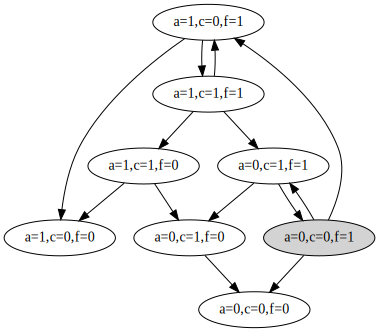

In [9]:
metazoan = pypint.load("models/metazoan.an")
metazoan.reachable_stategraph()

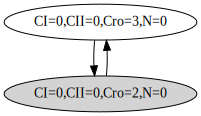

In [10]:
phage.having(attractors[1]["sample"]).reachable_stategraph() # display the cyclic attractor of the Lambda phage model

### Related functions and classes